In [17]:
%load_ext autoreload
%autoreload 2

from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import astropy
from tqdm import tqdm
import astropy.table
import pickle


import sys
sys.path.append('/data/groups/jeltema/zhou/lsst_shear/WeakLensingDeblending/bin')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import GCRCatalogs
print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)
# print('\n'.join(sorted(GCRCatalogs.get_available_catalogs())))

GCRCatalogs = 1.4.2 | GCR = 0.9.2


In [19]:
dc2_table = Table(fits.open('../data/dc2_subsampled.fits')[1].data)
print(len(dc2_table))

856856


In [21]:
result_list = pickle.load(open('../output/R11_result.pkl', "rb"))
mean_R11 = np.array([R11 for R11,std in result_list])
mean_std = np.array([std for R11,std in result_list])
print(mean_R11)
print(mean_std)

[0.24054121 0.18152916 0.08658976 0.23888146]
[0.00200766 0.00181329 0.0042246  0.00032502]


In [ ]:
mean_mass = np.load('../output/mean_mass.npy')
print(mean_mass)

[10.40617289 11.89314148 13.11307238 14.1981084 ]


Text(0.5, 0.8, 'JK patches=100\nnsim=1E5 per bin')

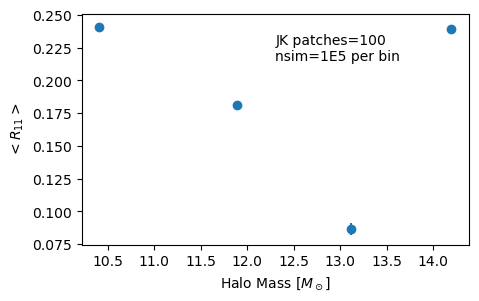

In [31]:
plt.figure(figsize=(5,3))
plt.errorbar(mean_mass, mean_R11, yerr=mean_std, fmt='o')
plt.xlabel(r'Halo Mass [$M_\odot$]')
plt.ylabel('$<R_{11}>$')
plt.annotate('JK patches=100\nnsim=1E5 per bin', xy=(0.5, 0.8), xycoords='axes fraction')